<h2>Explanatory models in neonatology (Explain)</h2>

<h4>Introduction</h4>

Critically ill patients are fragile, and their physiology is complex and frequently only partially understood. Diagnostic reasoning, clinical decision making, and communication between members of the healthcare team often take place under time pressure. Mathematical models of human physiology can support the understanding of a range of conditions, but remain inaccessible to most clinicians due to a lack of mathematical and/or code reading skills. The use of these models in reasoning and decision making is even more challenging than their use in understanding conditions. To overcome these obstacles we propose to use the concept and method of explanatory models, first described in the medical educational context (1). Our initial focus will be on deeper understanding of, and reasoning about, cardiorespiratory (patho)physiology by academic researchers in a neonatal intensive care setting. The explanatory model for this purpose will be referred to as "Explain".  Our ultimate objective remains support of clinical decision making. The Explain model is an extensive integrated model of the human (neonatal) physiology.

<h4>Requirements</h4>

The preferred way to use Explain is by using the webbased version (https://explain-modeling.com). <br>
No additional setup is necessary and the interactive python notebook runs on every major browser. You can apply for a free account by e-mailing to: tim.antonius@radboudumc.nl

To use Explain on a local computer additional steps are necessary. For performance reasons we advise to use PyPy version 3.10 (https://www.pypy.org/) which is a fast, compliant alternative implementation of the Python language but it can be run with the normal CPython interpreter from version 3.9 and higher. It uses the jupyter, ipykernel, ipympl, matplotlib and multitimer packages. PyPy is highly recommended as the computations of the Explain model greatly benefit from PyPy's JIT compiler. VS Code is a good and free editor capable of running interactive python notebooks. As the Explain model also uses some C++ modules the setup is not straightforward. <br><br>Detailed instructions on how to setup your workplace for using the local version of Explain in Windows/Linux/OsX are found here: 

<h4>Let's go</h4>
This interactive python notebook (Jupyter) contains the python implementation of the Explain model. The purpose of this notebook is to provide a framework for developers to use Explain for research purposes where clinical problems can be modeled and analyzed. It can be used to test a hypothesis, to explain complex physiology or facilitate clinical discussions. It is also possible to add models, to extend the existing models and to build your own set of patients.

The code is partially optimized for speed, is modular in design but is especially made for readability and explanation. The notebook contains the conceptual and mathematical models and provides links to the python code. By following this notebook step-by-step you'll get a better understanding on how the Explain model actually works and how to build your own patients and even add your own models.

This notebook is read-only but you can experiment all you want whether by duplicating this notebook or by using the template notebook. The tutorial uses the normal_neonate.json configuration file for setting the model properties. This configuration file is also read-only but you can modify or create your own model configuration file by duplicating this normal_neonate.json file or by using the template_config.json file.

<H4>First steps</h4>

We first have to import the ModelEngine module. The ModelEngine is like the conductor of the orchestra. It takes care of all setup and running of the model. After importing the ModelEngine module we have to provide it with a JSON file containing all model specific parameters. The ModelEngine returns an instance of the ModelEngine containing the model. We store this instance in the variable 'model' but this can have any name.  More details on the ModelEngine and JSON settings file will come later.

Now run the Python code by clicking on the code-block below and press SHIFT-ENTER

In [25]:
# import the model engine
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model parameters file
model = ModelEngine("normal_neonate.json")

 Model 'normal neonate' loaded and initialized correctly.


If all goes well and the JSON file is processed correctly the ModelEngine will let you know that the model loaded and initialized correctly. <br>The model is now ready for use!
All information about the model is now contained in the variable 'model' which is a Python object.

This 'model' object has a range of properties and methods. The next code blocks show some examples of the model object methods and properties. <br> To study all methods and properties of the model object click here or open the ModelEngine.py module in the explain_core folder.
<br><br>Run the code blocks by clicking into them and press SHIFT-ENTER. 

In [8]:
model.description

'normal 3.3 kg neonate at an age of 72h without shunts'

In [9]:
result = model.calculate(time_to_calculate=10)

Like stated before, the 'model' object has a range of methods and properties. However, the ModelEngine is not designed to interact with directly as it has a lot of 'housekeeping' methods and abstractions. To make interfacing with the 'model' object more conventient a model interface object can be attached to the ModelEngine. There is a general model interface object which can be used but it is also possible to build your own custom model interface object based on the general model interface. This is a more advanced topic but can vastly increase your productivity so is worth exploring after this basic course of Explain. The next code block imports the general interface module and instantiates a model interface object called 'io' but can have any name you find convenient.

In [26]:
# import the general mode interface and instantiate it with the current model object
from explain_core.interfaces.BaseInterface import BaseInterface

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
io = BaseInterface(model)

The 'io' object is now your model interface which provides an easier way to interact with the model. It has a number of methods which we will encounter soon.
The first and easiest is the 'calculate' method. This method takes 1 argument called 'time_to_calculate' which states the number of seconds that will be calculated.
<br><br>Execute the next code block with SHIFT-ENTER

In [54]:
io.calculate(time_to_calculate=10)

 Ready in 1.2 sec. Average model step in 0.0593 ms.


The model is now 10 seconds older! <br><br>
Another important method of the general interface is the 'analyze' method. This method analyzes the requested model variables and returns the result. Before we discuss all the possibilities of this important method let's first do a simple analysis.
<br><br>Again execute the code block with SHIFT-ENTER (from now on we leave out this instruction and assume you get the idea :)

In [27]:
result = io.analyze(
    ["AA.pres", "LV_AA.flow"],
    time_to_calculate=10,
    weight_based=True,
    sampleinterval=0.0005,
    suppress_output=False,
)

AA.pres         : max   77.16909, min   43.07311 mmHg
LV_AA.flow      : net  244.09353, forward  244.09353, backward        0.0 ml/kg/min, stroke volume:    1.84901 ml/kg, 


This is a slightly more complex method which takes a number of required and optional arguments. Let's break this method down. <br>
The first and required argument is a list of model variables which the model will analyze. A list is enclosed in brackets [ ] and a model variable is enclosed by " ".
Between the " " the model name is stated first and the variable of that model second separated by a dot (dot-notation style). So if you want to analyze the pressure (pres) in the ascending aorta model called AA the list argument becomes <b>["AA.pres"]</b>. Multiple variables are separated by comma's, p.e. <b>["AA.pres", "AA.vol", "PA.pres"]</b>. The analyze routine outputs the result but you can also store it in another object (in the example the object is called result). 
<br><br>
There are several optional arguments. When an argument is not set the default value is used: 
<li> <b><i>time_to_calculate</i></b> = no of seconds. The default is 10 seconds.</li>
<li> <b><i>weight_based</i></b> = True/False. When True the result are shown relative to the weight when appropriate. The default is False. </li>
<li> <b><i>sampleinterval</i></b> = no of seconds. When a higher resolution analysis is required choose 0.0005 seconds.  The default is 0.005 seconds. </li>
<li> <b><i>suppress_output</i></b> = True/False. Set True when you want to store the result but don't want the printed output. The default is False.  </li>


Another example of the 'analyze' method of the general model interface. Notice that when you type io. and press the TAB key all methods of the io object will appear.

In [55]:
result = io.analyze(
    ["LV.vol", "AA_COR.flow", "PA.pres"],
    time_to_calculate=30,
    weight_based=False,
    sampleinterval=0.0005,
    suppress_output=False,
)

LV.vol          : max     8.2927, min    2.58373 ml
AA_COR.flow     : net    9.04085, forward    9.04085, backward        0.0 ml/min, stroke volume:    0.06367 ml, 
PA.pres         : max   40.44114, min    17.2943 mmHg


The next method of the general model interface is the plot_time_graph method. This method plots a graph where the change of a model variable is plotted in time. <br><br>First let's do a quick demonstration before we dive into the nuts and bolts of this powerful plotter method.

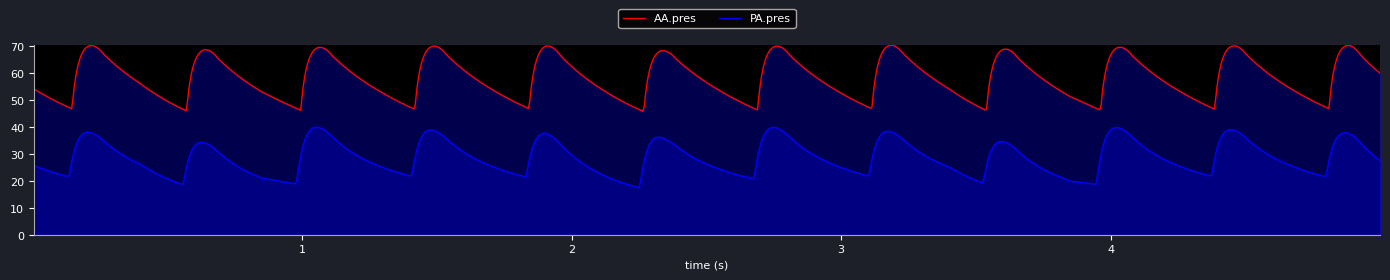

AA.pres         : max   70.28863, min   45.78117 mmHg
PA.pres         : max   39.89059, min   17.52365 mmHg


In [32]:
io.plot_time_graph(["AA.pres", "PA.pres"], time_to_calculate=5.0, analyze=True)

This plotter function has some really nice features which we have to dive into to realize it's full potential. <br>
Just like the 'analyze' method the plot_time_graph method takes 1 required argument which is a list of model variables. See the explanation of the analyze method for a detailed description on how to format such a list. You can have a maximum of 6 model variables in the same plot. <br><br>
There are several optional arguments. When an argument is not set the default value is used: 
<li><b><i>combined</i></b>=True/False. The default is True. This determines whether the plotter plots all model variables of the list in 1 plot. When set to False every model variable is plotted in a separate subplot.
<li><b><i>sharey</i></b>=True/False. The defualt is True. This determines whether or not all the subplots have the same y-axis scale. The first model variables determines the scale.
<br><br>
See an example of multiple plots below

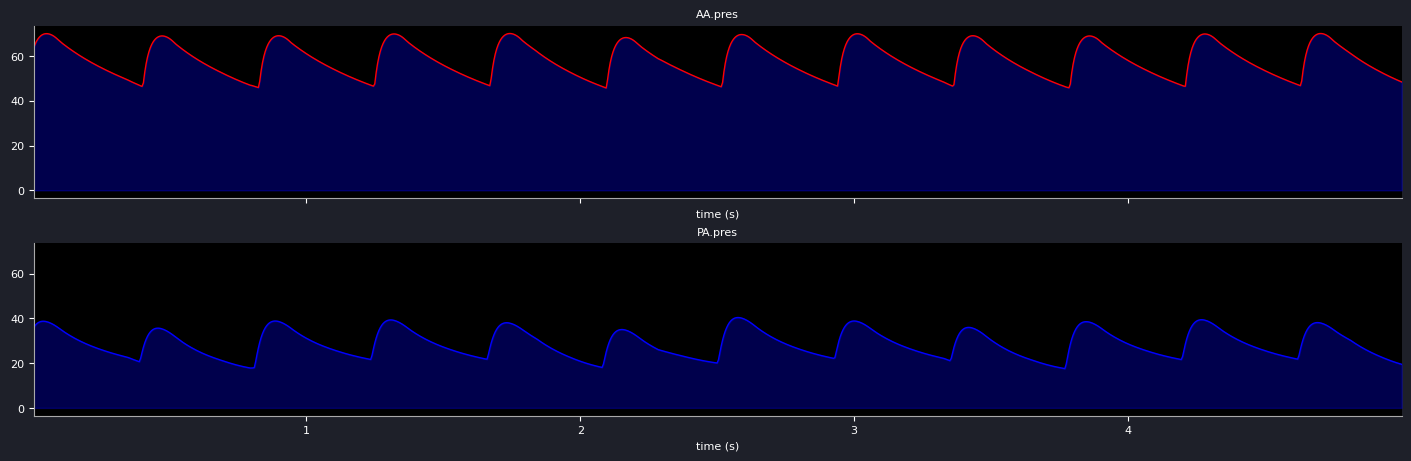

AA.pres         : max   70.08252, min   45.72525 mmHg
PA.pres         : max   40.38224, min   17.54744 mmHg


In [35]:
io.plot_time_graph(
    ["AA.pres", "PA.pres"],
    time_to_calculate=5.0,
    combined=False,
    sharey=True,
    analyze=True,
)

Other optional arguments of the plotter functions are:

<li><b><i>analyze</i></b>=True/False. When set to True the plotter outputs an analysis of the model variables at the bottom of the graph.
<li><b><i>sampleinterval</i></b>=0.005. When a higher resolution plot is desired set this value to 0.0005.
<li><b><i>fill</i></b>=True/False. Determines whether the space below the graph is filled. Default is True.
<li><b><i>fill_between</i></b>=True/False. Determines whether the space between the first two model variables is filled. Default is False.
<li><b><i>zeroline</i></b>=True/False. If set to True a dotted line at y=0 will be shown. Default is False
<li><b><i>ylabel</i></b>=textlabel. You can set the argument to a textlabel which will be shown on the y-axis. Default = ""
<li><b><i>autoscale</i></b>=True/False. If set to true the y-axis will autoscale. If False the plot uses the ylowerlim and yupperlim as limits for the y-axis. Default is True.
<li><b><i>ylowerlim</i></b>=number. If autoscale is False then this argument sets the lower limit of the y-axis. Default = 0
<li><b><i>yupperlim</i></b>=number. If autoscale is False then this argument sets the upper limit of the y-axis. Default = 100
<br><br>
The 'plot_time_graph' method is a powerful method. Just to make sure: you only have to pass the required argument which is the list of model variables you want to display. Only set the other optional arguments if you don't want to use the default values. Below is an example where ALL arguments are set.


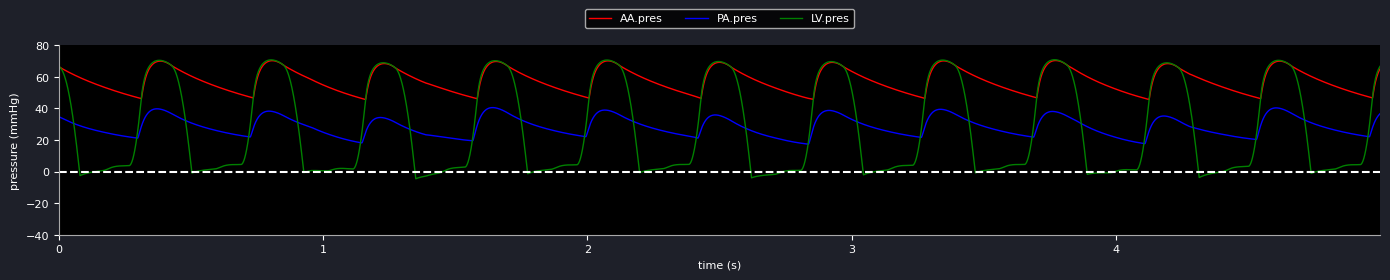

AA.pres         : max    70.3315, min   45.62352 mmHg
PA.pres         : max   40.52327, min   17.37185 mmHg
LV.pres         : max   70.83297, min   -4.53956 mmHg


In [51]:
io.plot_time_graph(
    ["AA.pres", "PA.pres", "LV.pres"],
    time_to_calculate=5.0,
    combined=True,
    sharey=True,
    analyze=False,
    fill=False,
    ylabel="pressure (mmHg)",
    autoscale=False,
    ylowerlim=-40,
    yupperlim=80,
    zeroline=True,
    sampleinterval=0.0005,
    analyze=True,
)